In this model now  i will **change the learning rate**, i will make a **different preprocessing of image dimentions**, then i will make comparisions in the report

In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator


**Load dataset,preprocess images**
I changed the image dimentions, removed the rotation tange from the augmentation since my dataset is composed only from images with pi angels

In [2]:
import os

from google.colab import drive
drive.mount('/content/drive')

datadir = '/content/drive/MyDrive/Data/8dataset'
trainingset = datadir+'/train/'
testset = datadir + '/test/'

batch_size = 32
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,\
    zoom_range=0.1,\
    #rotation_range=10,\  #without rotation range
    width_shift_range=0.1,\
    height_shift_range=0.1,\
    horizontal_flip=True,\
    vertical_flip=False)

# image dimentions changed from 250x250 to 300x300
train_generator = train_datagen.flow_from_directory(
    directory=trainingset,
    target_size=(300, 300),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True)

test_datagen = ImageDataGenerator(
    rescale = 1. / 255)

# image dimentions changed from 250x250 to 300x300
test_generator = test_datagen.flow_from_directory(
    directory=testset,
    target_size=(300, 300),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

num_samples = train_generator.n
num_classes = train_generator.num_classes
input_shape = train_generator.image_shape

classnames = [k for k,v in train_generator.class_indices.items()]

print("Image input %s" %str(input_shape))
print("Classes: %r" %classnames)

print('Loaded %d training samples from %d classes.' %(num_samples,num_classes))
print('Loaded %d test samples from %d classes.' %(test_generator.n,test_generator.num_classes))


Mounted at /content/drive
Found 6839 images belonging to 8 classes.
Found 1855 images belonging to 8 classes.
Image input (300, 300, 3)
Classes: ['Cloths_Wipes', 'Potato_Chips_bag', 'Raspberries', 'Seltzer_Water', 'fruit_plate', 'glass_food_container', 'rice_sides', 'steak_knives']
Loaded 6839 training samples from 8 classes.
Loaded 1855 test samples from 8 classes.


**Import Libraries**

In [4]:
import tensorflow as tf
import keras
from keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D,AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras import regularizers
from keras import optimizers
from keras import Sequential
from keras.optimizers import Adam
from keras.models import Sequential





print('libraries imported by Alkid')

libraries imported by Alkid


**Definition of the Convolutional Neural Network**,    changed the learning rate from 0.00001 to 0.001, and changed the padding from valid to same for all conv layers  , adam optimizer

In [ ]:

def Neural_Network(input_shape,learning_rate):

    model = Sequential()

    # C1 Convolutional Layer  //////////////////
    model.add(Conv2D(filters=32, input_shape=input_shape, kernel_size=(7,7),strides=(2,2),padding='same'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
    # Batch Normalisation 
    model.add(BatchNormalization())

    # C2 Convolutional Layer  /////////////////
    model.add(Conv2D(filters=64,kernel_size=(4,4),strides=(1,1),padding='same'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # C3 Convolutional Layer //////////////////
    model.add(Conv2D(filters=128,kernel_size=(4,4),strides=(1,1),padding='same'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # C4 Convolutional Layer
    model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1),padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # C5 Convolutional Layer
    model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1)))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1),))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Flatten
    model.add(Flatten())

    flatten_shape = (input_shape[0]*input_shape[1]*input_shape[2],)
    
    # D1 Dense Layer
    model.add(Dense(512,input_shape=flatten_shape))
    model.add(Activation('relu'))
    # Dropout
    model.add(Dropout(0.2))       
    
    # D2 Dense Layer
    model.add(Dense(256))
    model.add(Activation('relu'))
    # Dropout
    model.add(Dropout(0.2))
    
    # D3 Dense Layer
    model.add(Dense(128))
    model.add(Activation('relu'))
    # Dropout
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    # Output Layer
    model.add(Dense(8))
    model.add(Activation('softmax'))

    # Compile
    
    adam = optimizers.Adam(learning_rate=learning_rate,)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

model = Neural_Network(input_shape,learning_rate=0.001) #changed the learning rate from 0.00001 to 0.001
model.summary()
print('excecuted by ALKID')
print('Alkid')

Network 2 with different optimizer, SGD

In [21]:

def Neural_Network(input_shape,learning_rate,optimizuesi = "adam"): # adam , SGD

    model = Sequential()

    # C1 Convolutional Layer  //////////////////
    model.add(Conv2D(filters=32, input_shape=input_shape, kernel_size=(7,7),strides=(2,2),padding='same'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
    # Batch Normalisation 
    model.add(BatchNormalization())

    # C2 Convolutional Layer  /////////////////
    model.add(Conv2D(filters=64,kernel_size=(4,4),strides=(1,1),padding='same'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # C3 Convolutional Layer //////////////////
    model.add(Conv2D(filters=128,kernel_size=(4,4),strides=(1,1),padding='same'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # C4 Convolutional Layer
    model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1),padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # C5 Convolutional Layer
    model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1)))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1),))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Flatten
    model.add(Flatten())

    flatten_shape = (input_shape[0]*input_shape[1]*input_shape[2],)
    
    # D1 Dense Layer
    model.add(Dense(512,input_shape=flatten_shape))
    model.add(Activation('relu'))
    # Dropout
    model.add(Dropout(0.2))       
    
    # D2 Dense Layer
    model.add(Dense(256))
    model.add(Activation('relu'))
    # Dropout
    model.add(Dropout(0.2))
    
    # D3 Dense Layer
    model.add(Dense(128))
    model.add(Activation('relu'))
    # Dropout
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    # Output Layer
    model.add(Dense(8))
    model.add(Activation('softmax'))

    # Compile
    adam = optimizers.Adam(learning_rate=learning_rate)
    
    SGD = optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=False, name='SGD')
    
    if optimizuesi=="adam":
      model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
      print("Optimizuesi eshte : " + optimizuesi)
    elif optimizuesi=="SGD":
      model.compile(loss='categorical_crossentropy', optimizer=SGD, metrics=['accuracy'])
      print("Optimizuesi eshte : " + optimizuesi)
    return model

model = Neural_Network(input_shape,learning_rate=0.001) #changed the learning rate from 0.00001 to 0.001
model.summary()
print('excecuted by ALKID')
print('Alkid')

Optimizuesi eshte : adam
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 150, 150, 32)      4736      
_________________________________________________________________
activation_90 (Activation)   (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
batch_normalization_60 (Batc (None, 75, 75, 32)        128       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 75, 75, 64)        32832     
_________________________________________________________________
activation_91 (Activation)   (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_51 (MaxPooling

**Training of the model for 50 epochs**

In [ ]:
steps_per_epoch=train_generator.n//train_generator.batch_size
val_steps=test_generator.n//test_generator.batch_size+1
epochs = 10
try:
    history = model.fit(train_generator, epochs=epochs, verbose=1,\
                    steps_per_epoch=steps_per_epoch,\
                    validation_data=test_generator,\
                    validation_steps=val_steps)
except KeyboardInterrupt:
    pass

Epoch 1/50
213/213 [==============================] - 140s 652ms/step - loss: 2.2329 - accuracy: 0.2280 - val_loss: 2.7581 - val_accuracy: 0.2323
Epoch 2/50
213/213 [==============================] - 140s 659ms/step - loss: 1.7830 - accuracy: 0.3503 - val_loss: 2.2129 - val_accuracy: 0.3288
Epoch 3/50
213/213 [==============================] - 140s 659ms/step - loss: 1.7361 - accuracy: 0.3745 - val_loss: 1.5272 - val_accuracy: 0.4453
Epoch 4/50
213/213 [==============================] - 142s 668ms/step - loss: 1.7706 - accuracy: 0.3468 - val_loss: 2.2116 - val_accuracy: 0.3213
Epoch 5/50
213/213 [==============================] - 142s 669ms/step - loss: 1.6834 - accuracy: 0.3793 - val_loss: 4.0552 - val_accuracy: 0.1698
Epoch 6/50
213/213 [==============================] - 143s 672ms/step - loss: 1.5858 - accuracy: 0.4179 - val_loss: 1.4692 - val_accuracy: 0.4706
Epoch 7/50
213/213 [==============================] - 143s 669ms/step - loss: 1.4979 - accuracy: 0.4509 - val_loss: 1.3650 -

train new model with **SGD** or **adam** optimizer

In [ ]:
steps_per_epoch=train_generator.n//train_generator.batch_size
val_steps=test_generator.n//test_generator.batch_size+1
epochs = 10
try:
    history = model.fit(train_generator, epochs=epochs, verbose=1,\
                    steps_per_epoch=steps_per_epoch,\
                    validation_data=test_generator,\
                    validation_steps=val_steps)
except KeyboardInterrupt:
    pass

Epoch 1/10
  3/213 [..............................] - ETA: 59:13 - loss: 2.8566 - accuracy: 0.1840  

**Save the model**

In [ ]:
import os

models_dir = datadir + '/models/'

def savemodel(model,problem):
    filename = os.path.join(models_dir, '%s.h5' %problem)
    model.save(filename)
    print("\nModel saved successfully on file %s\n" %filename)

# Save the model
savemodel(model,'second model_for_comaprision_RoboCup_dataset_HW_trained_with_50_epochs_lr=0.001_300x300 dim_noPadding')


Model saved successfully on file /content/drive/MyDrive/Data/8dataset/models/RoboCup_dataset_HW_trained_with_100 epochs.h5



**Evaluate the model**

In [ ]:
test_generator = test_datagen.flow_from_directory(
    directory=testset,
    target_size=(300, 300),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)
val_steps=test_generator.n//test_generator.batch_size+1
loss, acc = model.evaluate(test_generator,verbose=1,steps=val_steps)
print('Test loss: %f' %loss)
print('Test accuracy: %f' %acc)



Found 1855 images belonging to 8 classes.
58/58 [==============================] - 6s 104ms/step - loss: 0.7247 - accuracy: 0.8097
Test loss: 0.724729
Test accuracy: 0.809704


**Precision, recall, F-score**

In [ ]:

import sklearn.metrics 
from sklearn.metrics import classification_report, confusion_matrix

val_steps=test_generator.n//test_generator.batch_size+1

test_generator = test_datagen.flow_from_directory(
    directory=testset,
    target_size=(300, 300),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

preds = model.predict(test_generator,verbose=1,steps=val_steps)

Ypred = np.argmax(preds, axis=1)
Ytest = test_generator.classes  

print(classification_report(Ytest, Ypred, labels=None, target_names=classnames, digits=3))


  

Found 1855 images belonging to 8 classes.
58/58 [==============================] - 6s 103ms/step
                      precision    recall  f1-score   support

        Cloths_Wipes      0.782     0.620     0.692       266
    Potato_Chips_bag      0.841     0.783     0.811       203
         Raspberries      0.844     0.912     0.877       238
       Seltzer_Water      0.804     0.781     0.792       210
         fruit_plate      0.673     0.769     0.718       273
glass_food_container      0.869     0.852     0.861       203
          rice_sides      0.809     0.908     0.855       238
        steak_knives      0.917     0.884     0.900       224

            accuracy                          0.810      1855
           macro avg      0.817     0.814     0.813      1855
        weighted avg      0.812     0.810     0.808      1855



**Confusion matrix analysis**

In [ ]:
import sklearn.metrics 
from sklearn.metrics import classification_report, confusion_matrix

val_steps=test_generator.n//test_generator.batch_size+1

test_generator = test_datagen.flow_from_directory(
    directory=testset,
    target_size=(300, 300),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

preds = model.predict_generator(test_generator,verbose=1,steps=val_steps)

Ypred = np.argmax(preds, axis=1)
Ytest = test_generator.classes  

cm = confusion_matrix(Ytest, Ypred)

conf = [] 
for i in range(0,cm.shape[0]):
  for j in range(0,cm.shape[1]):
    if (i!=j and cm[i][j]>0):
      conf.append([i,j,cm[i][j]])

col=2
conf = np.array(conf)
conf = conf[np.argsort(-conf[:,col])]  

print('%-16s     %-16s  \t%s \t%s ' %('True','Predicted','errors','err %'))
print('------------------------------------------------------------------')
for k in conf:
  print('%-16s ->  %-16s  \t%d \t%.2f %% ' %(classnames[k[0]],classnames[k[1]],k[2],k[2]*100.0/test_generator.n))
  

Found 1855 images belonging to 8 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


58/58 [==============================] - 6s 100ms/step
True                 Predicted         	errors 	err % 
------------------------------------------------------------------
Cloths_Wipes     ->  fruit_plate       	38 	2.05 % 
Cloths_Wipes     ->  Seltzer_Water     	20 	1.08 % 
fruit_plate      ->  rice_sides        	16 	0.86 % 
steak_knives     ->  fruit_plate       	15 	0.81 % 
Seltzer_Water    ->  Cloths_Wipes      	14 	0.75 % 
Potato_Chips_bag ->  rice_sides        	13 	0.70 % 
glass_food_container ->  fruit_plate       	13 	0.70 % 
Potato_Chips_bag ->  fruit_plate       	13 	0.70 % 
Cloths_Wipes     ->  Potato_Chips_bag  	12 	0.65 % 
fruit_plate      ->  glass_food_container  	12 	0.65 % 
Raspberries      ->  fruit_plate       	12 	0.65 % 
Cloths_Wipes     ->  Raspberries       	11 	0.59 % 
fruit_plate      ->  Cloths_Wipes      	11 	0.59 % 
fruit_plate      ->  Raspberries       	10 	0.54 % 
Cloths_Wipes     ->  rice_sides        	10 	0.54 % 
Seltzer_Water    ->  Potato_Chips_b

**Plot results**

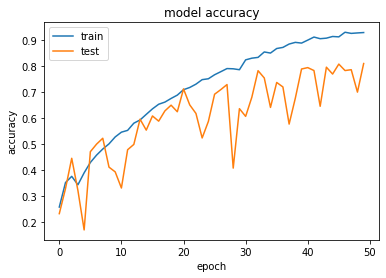

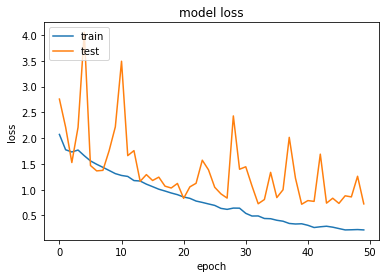

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()